## Credit Card Fraud Detection
 -----------------------------------------------------------------------
 (Case Study Group Members - Nisha & Jayshree)

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

#### Approach:
1. Analyzed Data and done EDA
2. Used 3 models- Random Forest, XGBoost & Decision Trees
3. Done Hyper parameter tuning for each model on 3 data sets - Imbalance, SMOTE & ADasyn
4. Compared the models on AUC score and Recall primarily chose the best fit model
     ----In our case XGboost is the winner
5. Found out Threshold probability
6. Feature Importance Exercise done 
7. Cost Benefit analysis done

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [15]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\capstone\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [220]:
#observe the different feature type present in the data
print("Shape ", df.shape)
print("Data Summary")
print(df.describe())

Shape  (284807, 31)
Data Summary
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.

In [221]:
#Null Value Check

print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


##### No Null Values in data

Here we will observe the distribution of our classes

In [17]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Fraudulent % ", fraud_share)
print("Non Fraudulent shares %", normal_share)
print(classes.values)

Fraudulent %  0.1727485630620034
Non Fraudulent shares % 99.82725143693798
[284315    492]


####Checking for Skewness across columns, Skewness will be handled later in the code###

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028785FADE08>,
      dtype=object)

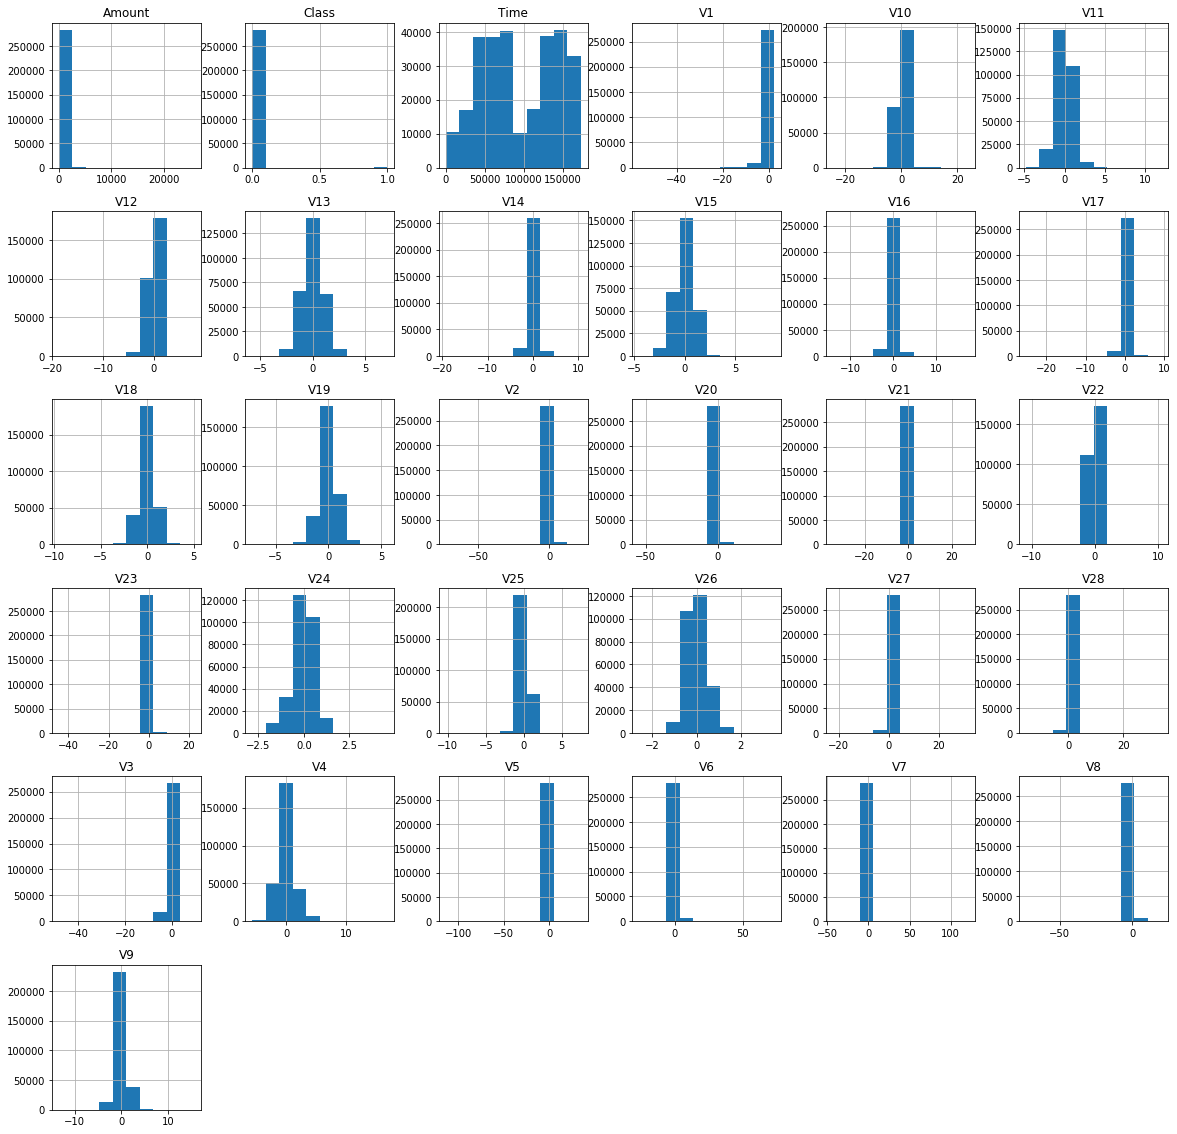

In [201]:
df.skew()
df.hist()

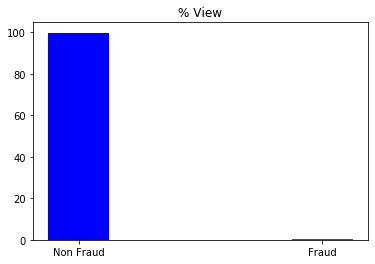

Text(0, 0.5, 'Frequency')

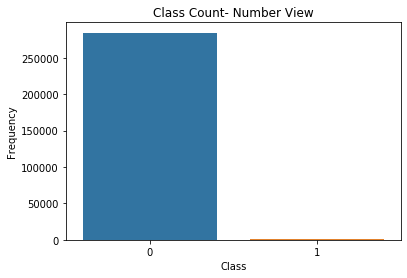

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.bar("Non Fraud",normal_share, color = 'b', width = 0.25)
plt.bar("Fraud", fraud_share, color = 'r', width = 0.25)
plt.title("% View")
plt.show()

class_count = pd.value_counts(df['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=df)
plt.title("Class Count- Number View")
plt.xlabel("Class")
plt.ylabel("Frequency")


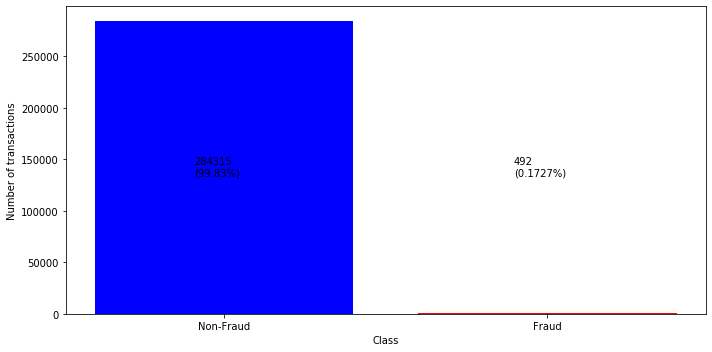

In [206]:
plt.figure(figsize=(10,5))
plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                        df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
plt.tight_layout()
plt.show()

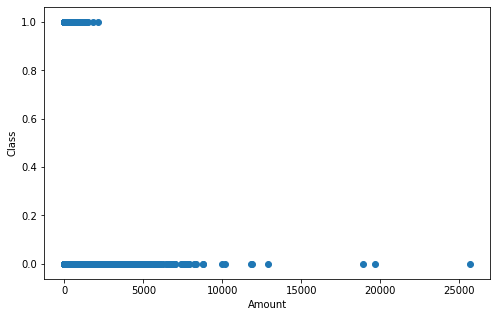

In [223]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(8,5))
plt.scatter(df['Amount'], df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()


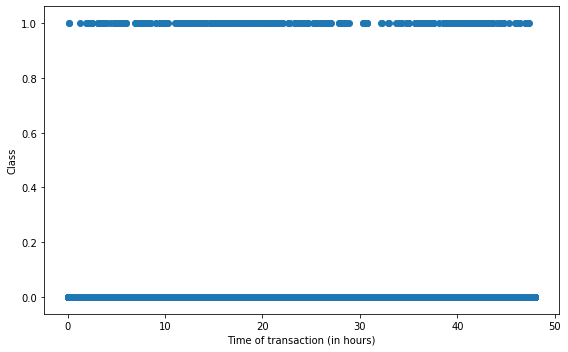

In [222]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(8,5))
plt.scatter(df['Time']/(60*60), df['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')
plt.tight_layout()
plt.show()


In [19]:
# Drop unnecessary columns
df1 = df.drop(['Time'], axis=1)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [22]:
Y= df1[['Class']]        #class variable
X=df1.drop("Class", axis=1)  #preparing target and independent variables
cols=X.columns

In [24]:
#original dimension of dataset
X.shape, Y.shape

((284807, 29), (284807, 1))

###### preparing Oversampled data sets for further usage

In [25]:
#SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
sm = SMOTE()
Xsmote, Ysmote = sm.fit_sample(X, Y)

In [29]:
#Adasyn

from imblearn.over_sampling import ADASYN

In [31]:
Xada, Yada = ADASYN().fit_sample(X, Y)

#### Dimesions of data sets after Smote and Adaysn OverSampling

In [32]:
print("Smote Samples:--")
print(Xsmote.shape, Ysmote.shape)
print("Adasyn Samples:----")
print(Xada.shape, Yada.shape)

Smote Samples:--
(568630, 29) (568630, 1)
Adasyn Samples:----
(568555, 29) (568555, 1)


###### Splitting all data sets into train and Test

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

##### train test split with class balancing

In [51]:
#SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(Xsmote, Ysmote, test_size = 0.25, random_state = 0)
#ADA
X_train_ada, X_test_ada, y_train_ada, y_test_ada= train_test_split(Xada, Yada, test_size = 0.25, random_state = 0)

#### Applying Powertransformer to handle skewness and scaling

In [52]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [130]:
pt = PowerTransformer(method='yeo-johnson', standardize=True) 
X_train =pt.fit_transform(X_train)
X_test =pt.fit_transform(X_test)

In [136]:
X_train_smote=pt.fit_transform(X_train_smote)
X_train_ada =pt.fit_transform(X_train_ada)
X_test_smote=pt.fit_transform(X_test_smote)
X_test_ada =pt.fit_transform(X_test_ada)

## Model Building

### Model -1 : Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

#### with Class Imbalance

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
#hyperparameter Tuning

from sklearn.model_selection import KFold


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 100,300),'max_depth': range(10, 30, 5),'max_features': [3, 8, 16,25],
              'min_samples_leaf': range(100, 400, 50), 'min_samples_split': range(50, 300, 50)}

# instantiate the model (note we are specifying a max_depth)
rf1 = RandomForestClassifier(class_weight="balanced")
rfgs = RandomizedSearchCV(rf1, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")


In [59]:
rfgs.fit(X_train,y_train.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': range(10, 30, 5),
                                        'max_features': [3, 8, 16, 25],
                                        'min_samples_leaf': range(100, 400, 50),
                                        'min_samples_split': range(50, 300, 50),
                                        'n_estimators': range(50, 100, 300)},
                   return_train_score=True, scoring='accuracy')

In [60]:
#Best params identification
print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.9978324477423282 using {'n_estimators': 50, 'min_samples_split': 200, 'min_samples_leaf': 150, 'max_features': 25, 'max_depth': 25}


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc_imbalance = RandomForestClassifier(bootstrap=True,class_weight="balanced",
                             max_depth=25,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=25,
                             n_estimators=50,
                             random_state=10,n_jobs=-1)

In [66]:
#training model
rfc_imbalance.fit(X_train,y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=25,
                       min_samples_leaf=150, min_samples_split=200,
                       n_estimators=50, n_jobs=-1, random_state=10)

In [70]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [67]:
y_train_predict=rfc_imbalance.predict(X_train)

In [ ]:
## Training Metrics 

In [229]:
print("Training Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train, y_train_predict))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, y_train_predict))
print ("Precision : %.4g" % metrics.precision_score(y_train,y_train_predict))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_train_predict))

Training Model parameters: 
AUC : 0.9964
Recall/Sensitivity : 0.9946
Precision : 0.4818
Accuracy : 0.9981


In [134]:
y_predict_test = rfc_imbalance.predict(X_test)

In [ ]:
#Test Performance Metrics

In [230]:
print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test, y_predict_test))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test, y_predict_test))
print ("Precision : %.4g" % metrics.precision_score(y_test, y_predict_test))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_predict_test))

Test Model parameters: 
AUC : 0.9241
Recall/Sensitivity : 0.85
Precision : 0.4359
Accuracy : 0.9979


In [ ]:
## Observations- as observed above AUC is impacted and Recall is decreased too.. 

### Random Forest with Class Balance 

##### Hyperparameter tuning with Smote

In [61]:
rfgs.fit(X_train_smote,y_train_smote.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': range(10, 30, 5),
                                        'max_features': [3, 8, 16, 25],
                                        'min_samples_leaf': range(100, 400, 50),
                                        'min_samples_split': range(50, 300, 50),
                                        'n_estimators': range(50, 100, 300)},
                   return_train_score=True, scoring='accuracy')

In [62]:
#Best Parameters

print('We can get accuracy of',rfgs.best_score_,'using',rfgs.best_params_)

We can get accuracy of 0.9908575482589969 using {'n_estimators': 50, 'min_samples_split': 100, 'min_samples_leaf': 150, 'max_features': 3, 'max_depth': 25}


In [73]:
#Building model with best params
rfc_smote = RandomForestClassifier(bootstrap=True,class_weight="balanced",
                             max_depth=25,
                             min_samples_leaf=150, 
                             min_samples_split=100,
                             max_features=3,
                             n_estimators=50,
                             random_state=10,n_jobs=-1)

In [74]:
rfc_smote.fit(X_train_smote,y_train_smote.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=3,
                       min_samples_leaf=150, min_samples_split=100,
                       n_estimators=50, n_jobs=-1, random_state=10)

In [141]:
y_train_smotepred=rfc_smote.predict(X_train_smote)

In [233]:
#Train performance Metrics
print("Training Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train_smote, y_train_smotepred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_smote, y_train_smotepred))
print ("Precision : %.4g" % metrics.precision_score(y_train_smote, y_train_smotepred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train_smote, y_train_smotepred))

Training Model parameters: 
AUC : 0.9943
Recall/Sensitivity : 0.9907
Precision : 0.998
Accuracy : 0.9943


In [157]:
y_test_smotepred = rfc_smote.predict(X_test_smote)

In [234]:
#Test performance Metrics

print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_smote, y_test_smotepred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_smote, y_test_smotepred))
print ("Precision : %.4g" % metrics.precision_score(y_test_smote, y_test_smotepred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_smote, y_test_smotepred))

Test Model parameters: 
AUC : 0.9905
Recall/Sensitivity : 0.9831
Precision : 0.9979
Accuracy : 0.9905


### Random Forest Model with  ADASyn

In [84]:
#hyper parameter tuning on RandomCV search

rfgs_ada = RandomizedSearchCV(rf1, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy",n_jobs=-1)

In [85]:
rfgs_ada.fit(X_train_ada,y_train_ada.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(10, 30, 5),
                                        'max_features': [3, 8, 16, 25],
                                        'min_samples_leaf': range(100, 400, 50),
                                        'min_samples_split': range(50, 300, 50),
                                        'n_estimators': range(50, 100, 300)},
                   return_train_score=True, scoring='accuracy')

In [86]:
#best Params
print('We can get accuracy of',rfgs_ada.best_score_,'using',rfgs_ada.best_params_)

We can get accuracy of 0.9982810214709963 using {'n_estimators': 50, 'min_samples_split': 150, 'min_samples_leaf': 100, 'max_features': 3, 'max_depth': 25}


In [87]:
#Building model with best params
rfc_ada = RandomForestClassifier(bootstrap=True,class_weight="balanced",
                             max_depth=25,
                             min_samples_leaf=100, 
                             min_samples_split=150,
                             max_features=3,
                             n_estimators=50,
                             random_state=10,n_jobs=-1)

In [88]:
rfc_ada.fit(X_train_ada,y_train_ada.values.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=3,
                       min_samples_leaf=100, min_samples_split=150,
                       n_estimators=50, n_jobs=-1, random_state=10)

In [89]:
y_train_adapred=rfc_ada.predict(X_train_ada)

In [235]:
#Train performance Metrics
print("Training Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train_ada, y_train_adapred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_ada, y_train_adapred))
print ("Precision : %.4g" % metrics.precision_score(y_train_ada, y_train_adapred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train_ada, y_train_adapred))

Training Model parameters: 
AUC : 0.9988
Recall/Sensitivity : 0.9998
Precision : 0.9979
Accuracy : 0.9988


In [139]:
y_test_adapred=rfc_ada.predict(X_test_ada)

In [236]:
#Test performance Metrics
print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_ada, y_test_adapred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_ada, y_test_adapred))
print ("Precision : %.4g" % metrics.precision_score(y_test_ada, y_test_adapred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_ada, y_test_adapred))

Test Model parameters: 
AUC : 0.9984
Recall/Sensitivity : 0.9994
Precision : 0.9974
Accuracy : 0.9984


## ----- Model 2: XGBoost

### With Class Imbalance

In [96]:
!pip install xgboost

In [97]:
from xgboost import XGBClassifier

In [99]:
#defining range of hyperparameters for hyper parameter tuning on RandomCV search
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [100]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [101]:
#time function to see how much time it takes for XGboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [102]:
classifier=xgboost.XGBClassifier()

In [104]:
#hyper parameter tuning on RandomCV search
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [105]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.values.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  2.0min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.9min remaining:   43.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.2min finished



 Time taken: 0 hours 3 minutes and 23.24 seconds.


In [106]:
#Best Parameters
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [109]:
#Building model with best params
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
start_time = timer(None)
temp=classifier.fit(X_train,y_train.values.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 18.65 seconds.


In [123]:
#for future use
fet=temp.get_booster()

In [146]:
y_trainxg_predict=classifier.predict(X_train)

###---#Training performance Metrics

In [237]:
print("Train Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train, y_trainxg_predict))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, y_trainxg_predict))
print ("Precision : %.4g" % metrics.precision_score(y_train, y_trainxg_predict))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_trainxg_predict))

Train Model parameters: 
AUC : 0.9314
Recall/Sensitivity : 0.8629
Precision : 0.9938
Accuracy : 0.9998


In [147]:
y_testxg_predict=classifier.predict(X_test)

In [238]:
#Test performance Metrics

print("Test Model parameters: ")
print ("AUC: %.4g" % metrics.roc_auc_score(y_test, y_testxg_predict))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test, y_testxg_predict))
print ("Precision : %.4g" % metrics.precision_score(y_test,y_testxg_predict))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test,y_testxg_predict))

Test Model parameters: 
AUC: 0.8958
Recall/Sensitivity : 0.7917
Precision : 0.9314
Accuracy : 0.9996


### XGBoost with Smote

In [151]:

start_time = timer(None) # timing starts from this point for "start_time" variable

#hyper parameter tuning on RandomCV search

random_search_smote=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search_smote.fit(X_train_smote,y_train_smote.values.ravel())

timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed: 12.1min remaining: 15.3min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 18.3min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 18.9min finished



 Time taken: 0 hours 19 minutes and 48.49 seconds.


In [152]:
#Best Parameters
random_search_smote.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
#Building model with best params
classifier_smote=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
start_time = timer(None)
classifier_smote.fit(X_train_smote,y_train_smote.values.ravel())
timer(start_time) # 


 Time taken: 0 hours 0 minutes and 49.53 seconds.


In [196]:
#Train performance Metrics

y_train_xgsmotepred=classifier_smote.predict(X_train_smote)
print("Training Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train_smote, y_train_xgsmotepred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_smote,y_train_xgsmotepred))
print ("Precision : %.4g" % metrics.precision_score(y_train_smote,y_train_xgsmotepred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train_smote,y_train_xgsmotepred))

Training Model parameters: 
AUC : 1
Recall/Sensitivity : 1
Precision : 1
Accuracy : 1


In [195]:
#Test performance Metric
y_test_xgsmotepred = classifier_smote.predict(X_test_smote)
print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_smote, y_test_xgsmotepred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_smote, y_test_xgsmotepred))
print ("Precision : %.4g" % metrics.precision_score(y_test_smote, y_test_xgsmotepred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_smote, y_test_xgsmotepred))

Test Model parameters: 
AUC : 0.9996
Recall/Sensitivity : 0.9997
Precision : 0.9995
Accuracy : 0.9996


## XGBoost with Ada

In [159]:
start_time = timer(None) # timing starts from this point for "start_time" variable

#hyper parameter tuning on RandomCV search
random_search_ada=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search_ada.fit(X_train_ada,y_train_ada.values.ravel())

timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  7.1min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 16.2min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.2min finished



 Time taken: 0 hours 17 minutes and 43.39 seconds.


In [160]:
#Best Parameters
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
#Building model with best params
classifier_ada=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
start_time = timer(None)
classifier_ada.fit(X_train_ada,y_train_ada.values.ravel())
timer(start_time) # 


 Time taken: 0 hours 0 minutes and 22.2 seconds.


In [239]:
#Train performance Metrics
y_train_xgadapred=classifier_ada.predict(X_train_ada)
print("Training Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train_ada, y_train_xgadapred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_ada, y_train_xgadapred))
print ("Precision : %.4g" % metrics.precision_score(y_train_ada, y_train_xgadapred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train_ada, y_train_xgadapred))

Training Model parameters: 
AUC : 0.9959
Recall/Sensitivity : 0.9997
Precision : 0.9921
Accuracy : 0.9959


In [241]:
#Test performance Metrics
y_test_xgadapred = classifier_ada.predict(X_test_ada)
print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_ada, y_test_xgadapred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_ada, y_test_xgadapred))
print ("Precision : %.4g" % metrics.precision_score(y_test_ada, y_test_xgadapred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_ada, y_test_xgadapred))

###try
probs = classifier_ada.predict_proba(X_test_ada)
preds = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_ada, preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold",threshold)

Test Model parameters: 
AUC : 0.9945
Recall/Sensitivity : 0.9986
Precision : 0.9904
Accuracy : 0.9945
Threshold 0.6036003


### Model 3: Decison Tree

##### Class Imbalance

In [271]:
#hyper parameter tuning on RandomCV search

from scipy.stats import randint 
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()

param_dist = {"max_depth": [2,4,6,8], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 

In [274]:
tree_cv = RandomizedSearchCV(dec_tree, param_dist, cv = 5, n_jobs=-1) 

In [283]:
tree_cv.fit(X_train, y_train.values.ravel()) 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028793D52B08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002878527EB88>})

In [276]:
#Best Parameters

tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 4}

In [284]:
#Building model with best params

dtree=tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_features= 7,min_samples_leaf= 4)

In [285]:
dtree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=7,
                       min_samples_leaf=4)

In [286]:
y_train_predictdt=dtree.predict(X_train)

In [287]:
y_test_predictdt=dtree.predict(X_test)

In [288]:

#Train performance Metrics

print("Train Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train, y_train_predictdt))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, y_train_predictdt))
print ("Precision : %.4g" % metrics.precision_score(y_train,y_train_predictdt))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_train_predictdt))

Train Model parameters: 
AUC : 0.9113
Recall/Sensitivity : 0.8226
Precision : 0.9623
Accuracy : 0.9996


In [289]:

#Test performance Metrics

print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test, y_test_predictdt))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test, y_test_predictdt))
print ("Precision : %.4g" % metrics.precision_score(y_test, y_test_predictdt))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_test_predictdt))

Test Model parameters: 
AUC : 0.8874
Recall/Sensitivity : 0.775
Precision : 0.8692
Accuracy : 0.9994


### Decision Tree with Smote Class balance

In [277]:
#hyper parameter tuning on RandomCV search

tree_cv_smote = RandomizedSearchCV(dec_tree, param_dist, cv = 5, n_jobs=-1) 
tree_cv_smote.fit(X_train_smote, y_train_smote) 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028793D52B08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002878527EB88>})

In [278]:
#Best Parameters
tree_cv_smote.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 4}

In [290]:
#Building model with best params
dtree_smote=tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 8, max_features= 5, min_samples_leaf= 4)

In [291]:
dtree_smote.fit(X_train_smote, y_train_smote.values.ravel())

DecisionTreeClassifier(max_depth=8, max_features=5, min_samples_leaf=4)

In [292]:

y_train_predictdtsm=dtree_smote.predict(X_train_smote)
y_test_predictdtsm=dtree_smote.predict(X_test_smote)

In [293]:
#Train performance Metrics
print("Train Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train_smote, y_train_predictdtsm))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_smote, y_train_predictdtsm))
print ("Precision : %.4g" % metrics.precision_score(y_train_smote, y_train_predictdtsm))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train_smote, y_train_predictdtsm))

Train Model parameters: 
AUC : 0.9637
Recall/Sensitivity : 0.9399
Precision : 0.9869
Accuracy : 0.9638


In [294]:
#Test performance Metrics

print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_smote, y_test_predictdtsm))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_smote, y_test_predictdtsm))
print ("Precision : %.4g" % metrics.precision_score(y_test_smote, y_test_predictdtsm))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_smote, y_test_predictdtsm))

Test Model parameters: 
AUC : 0.9618
Recall/Sensitivity : 0.9359
Precision : 0.9871
Accuracy : 0.9617


#### Decison Tree with Adasyn Class Balance

In [279]:
#hyper parameter tuning on RandomCV search

tree_cv_ada = RandomizedSearchCV(dec_tree, param_dist, cv = 5, n_jobs=-1) 
tree_cv_ada.fit(X_train_ada, y_train_ada) 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028793D52B08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002878527EB88>})

In [295]:
#Best Parameters
tree_cv_ada.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 5}

In [297]:
#Building model with best params
dtree_ada=tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 8, max_features= 7, min_samples_leaf= 5)

In [298]:
dtree_ada.fit(X_train_ada, y_train_ada.values.ravel())

DecisionTreeClassifier(max_depth=8, max_features=7, min_samples_leaf=5)

In [301]:
y_train_predictdtada=dtree_smote.predict(X_train_ada)
y_test_predictdtada=dtree_smote.predict(X_test_ada)

In [302]:
#Train performance Metrics

print("Train Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_train_ada, y_train_predictdtada))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_ada, y_train_predictdtada))
print ("Precision : %.4g" % metrics.precision_score(y_train_ada, y_train_predictdtada))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_train_ada, y_train_predictdtada))

Train Model parameters: 
AUC : 0.8523
Recall/Sensitivity : 0.7453
Precision : 0.948
Accuracy : 0.8523


In [303]:
#Test performance Metrics

print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_ada, y_test_predictdtada))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_ada, y_test_predictdtada))
print ("Precision : %.4g" % metrics.precision_score(y_test_ada, y_test_predictdtada))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_ada, y_test_predictdtada))

Test Model parameters: 
AUC : 0.8548
Recall/Sensitivity : 0.7508
Precision : 0.948
Accuracy : 0.8546


##### Model Analysis Below:

(Summary View of all the models)

XGBoost:
           | Imbalance   |SMOTE     |Adasyn     |
           |Train |Test  |Train|Test|Train |Test|  
    |AUC   |0.9314|0.8958|1|0.9996|0.9959|0.9945|
    |Recall|0.8629|0.7917|1|0.9997|0.9997|0.9986|
 |Precision|0.9938|0.9314|1|0.9995|0.9921|0.9904|
  |Accuracy|0.9998|0.9996|1|0.9996|0.9959|0.9945|

Random Forest:
           | Imbalance   |SMOTE        |Adasyn       |
           |Train |Test  |Train |Test  |Train |Test  |
       |AUC|0.9964|0.9241|0.9943|0.9905|0.9988|0.9984|
      |Recall|0.9946|0.85|0.9907|0.9831|0.9998|0.9994|
  |Precision|0.4818|0.4359|0.998|0.9979|0.9979|0.9974|
   |Accuracy|0.9981|0.9979|0.9943|0.9905|0.9988|0.9984|


Decision Tree:
           | Imbalance   |SMOTE        |Adasyn       |
           |Train |Test  |Train |Test  |Train |Test  |
       |AUC|0.9113|0.8874|0.9637|0.9618|0.8523|0.8548|
    |Recall|0.8226|0.775|0.9399|0.9359|0.7453|0.7508 |
 |Precision|0.9623|0.8692|0.9869|0.9871|0.948|0.948  |
  |Accuracy|0.9996|0.9994|0.9638|0.9617|0.8523|0.8546|

Results:
1. XGBoost has done very well in terms of AUC Score and Recall metrics. There is less overfitting seen as difference between Train and Test Metrics is quite small and insignificant
2. I would pick 2 models here as best model- 
   #### 1. XGBoost with SMOTE Class Balance 
   #### 2. Random Forest with Adasyn Class Balance

Final Model selected: 
#### 1. XGBoost with SMOTE Class Balance as it was quite fast and best AUC and recall with good precision and accuracy

### Best Model- XGboost with SMOTE

In [307]:
## Threshold Calculation
probs = classifier_smote.predict_proba(X_test_smote)
preds = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_smote, preds)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold",threshold)

Threshold 0.57097816


In [261]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print("FPR" , fpr)
print("TPR" , tpr)

FPR [0.         0.         0.         ... 0.99984476 0.99987298 1.        ]
TPR [0.00000000e+00 2.80497041e-05 4.68430058e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [255]:
#Test performance Metric for XGboost SMOTE class balance
y_test_xgsmotepred = classifier_smote.predict(X_test_smote)
print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_smote, y_test_xgsmotepred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_smote, y_test_xgsmotepred))
print ("Precision : %.4g" % metrics.precision_score(y_test_smote, y_test_xgsmotepred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_smote, y_test_xgsmotepred))

Test Model parameters: 
AUC : 0.9996
Recall/Sensitivity : 0.9997
Precision : 0.9995
Accuracy : 0.9996


In [304]:
#Test performance Metric for Random Forest with ADAsyn class balance
y_test_adapred=rfc_ada.predict(X_test_ada)
#Test performance Metrics
print("Test Model parameters: ")
print ("AUC : %.4g" % metrics.roc_auc_score(y_test_ada, y_test_adapred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_ada, y_test_adapred))
print ("Precision : %.4g" % metrics.precision_score(y_test_ada, y_test_adapred))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test_ada, y_test_adapred))

Test Model parameters: 
AUC : 0.9984
Recall/Sensitivity : 0.9994
Precision : 0.9974
Accuracy : 0.9984


In [306]:
probs1 = rfc_ada.predict_proba(X_test_ada)
preds1 = probs1[:,1]
fpr1, tpr1, thresholds = metrics.roc_curve(y_test_ada, preds1)

#### plotting ROC curve and comparing it with our 2nd best model i.e Random Forest with Adasyn


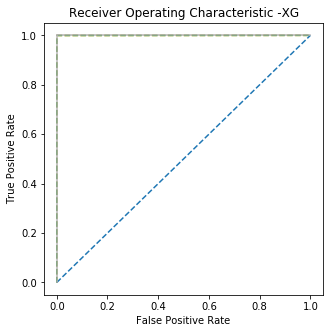

In [308]:
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic -XG')
    plt.plot(fpr, tpr, linestyle='--', color='orange',label='XGBoost SMOTE balance')
    plt.plot(fpr1, tpr1, linestyle='--', color='green',label='Random Forest ADAsyn Balance')
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### Print the important features of the best model to understand the dataset
######  ---- This will not give much explanation on the already transformed dataset
###### But it will help us in understanding if the dataset is not PCA transformed

In [243]:
#feature Importance from XGboost
imp=classifier_smote.feature_importances_
imp



array([0.03677816, 0.0009309 , 0.00377188, 0.27901733, 0.00549854,
       0.01868404, 0.0100898 , 0.01175491, 0.00489844, 0.05355959,
       0.04083201, 0.00430932, 0.00781326, 0.09385832, 0.00774378,
       0.03350851, 0.18730563, 0.01076223, 0.01801552, 0.01297089,
       0.00725232, 0.00828549, 0.00981206, 0.00963955, 0.00801884,
       0.00617954, 0.09053734, 0.00555768, 0.01261412], dtype=float32)

In [181]:
#fetching columns of Data
cols=list(X.columns)

In [244]:
#merging importance and feature names
#for name, importance in zip(df_cols, imp):
for name, importance in zip(cols, imp):
    print(name, "=", importance)

V1 = 0.03677816
V2 = 0.0009309016
V3 = 0.0037718788
V4 = 0.27901733
V5 = 0.0054985355
V6 = 0.018684037
V7 = 0.010089804
V8 = 0.0117549095
V9 = 0.0048984378
V10 = 0.05355959
V11 = 0.04083201
V12 = 0.0043093194
V13 = 0.00781326
V14 = 0.09385832
V15 = 0.0077437824
V16 = 0.033508513
V17 = 0.18730563
V18 = 0.010762232
V19 = 0.018015523
V20 = 0.012970888
V21 = 0.0072523225
V22 = 0.008285491
V23 = 0.009812063
V24 = 0.009639547
V25 = 0.008018836
V26 = 0.006179537
V27 = 0.09053734
V28 = 0.0055576754
Amount = 0.01261412


In [185]:
#storing in tuple
featmap=list(zip(cols, imp))

In [186]:
featmap

[('V1', 0.033248324),
 ('V2', 0.014844977),
 ('V3', 0.033145536),
 ('V4', 0.123717226),
 ('V5', 0.011577037),
 ('V6', 0.01859084),
 ('V7', 0.011659479),
 ('V8', 0.03050842),
 ('V9', 0.0195828),
 ('V10', 0.07551888),
 ('V11', 0.025034914),
 ('V12', 0.050478943),
 ('V13', 0.018132549),
 ('V14', 0.2747743),
 ('V15', 0.014193483),
 ('V16', 0.011175856),
 ('V17', 0.019217964),
 ('V18', 0.015881253),
 ('V19', 0.030864801),
 ('V20', 0.010825556),
 ('V21', 0.019454699),
 ('V22', 0.010491967),
 ('V23', 0.016084904),
 ('V24', 0.012846834),
 ('V25', 0.014390717),
 ('V26', 0.022155471),
 ('V27', 0.009602164),
 ('V28', 0.01760407),
 ('Amount', 0.03439604)]

In [187]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1],reverse=True))   

In [245]:
#sorting tuple
Sort_Tuple(featmap)

[('V14', 0.2747743),
 ('V4', 0.123717226),
 ('V10', 0.07551888),
 ('V12', 0.050478943),
 ('Amount', 0.03439604),
 ('V1', 0.033248324),
 ('V3', 0.033145536),
 ('V19', 0.030864801),
 ('V8', 0.03050842),
 ('V11', 0.025034914),
 ('V26', 0.022155471),
 ('V9', 0.0195828),
 ('V21', 0.019454699),
 ('V17', 0.019217964),
 ('V6', 0.01859084),
 ('V13', 0.018132549),
 ('V28', 0.01760407),
 ('V23', 0.016084904),
 ('V18', 0.015881253),
 ('V2', 0.014844977),
 ('V25', 0.014390717),
 ('V15', 0.014193483),
 ('V24', 0.012846834),
 ('V7', 0.011659479),
 ('V5', 0.011577037),
 ('V16', 0.011175856),
 ('V20', 0.010825556),
 ('V22', 0.010491967),
 ('V27', 0.009602164)]

In [247]:
df_feat=pd.DataFrame(imp,index=cols)

In [248]:
final_df = df_feat.sort_values(by=[0], ascending=False)

In [249]:
final=final_df[:12]

In [251]:
#printing top 12 features 
final.head(12)

,0
V4,0.279017
V17,0.187306
V14,0.093858
V27,0.090537
V10,0.053560
V11,0.040832
V1,0.036778
V16,0.033509
V6,0.018684
V19,0.018016


##### Graphical represenation of Feature Importance variable based on their ranks

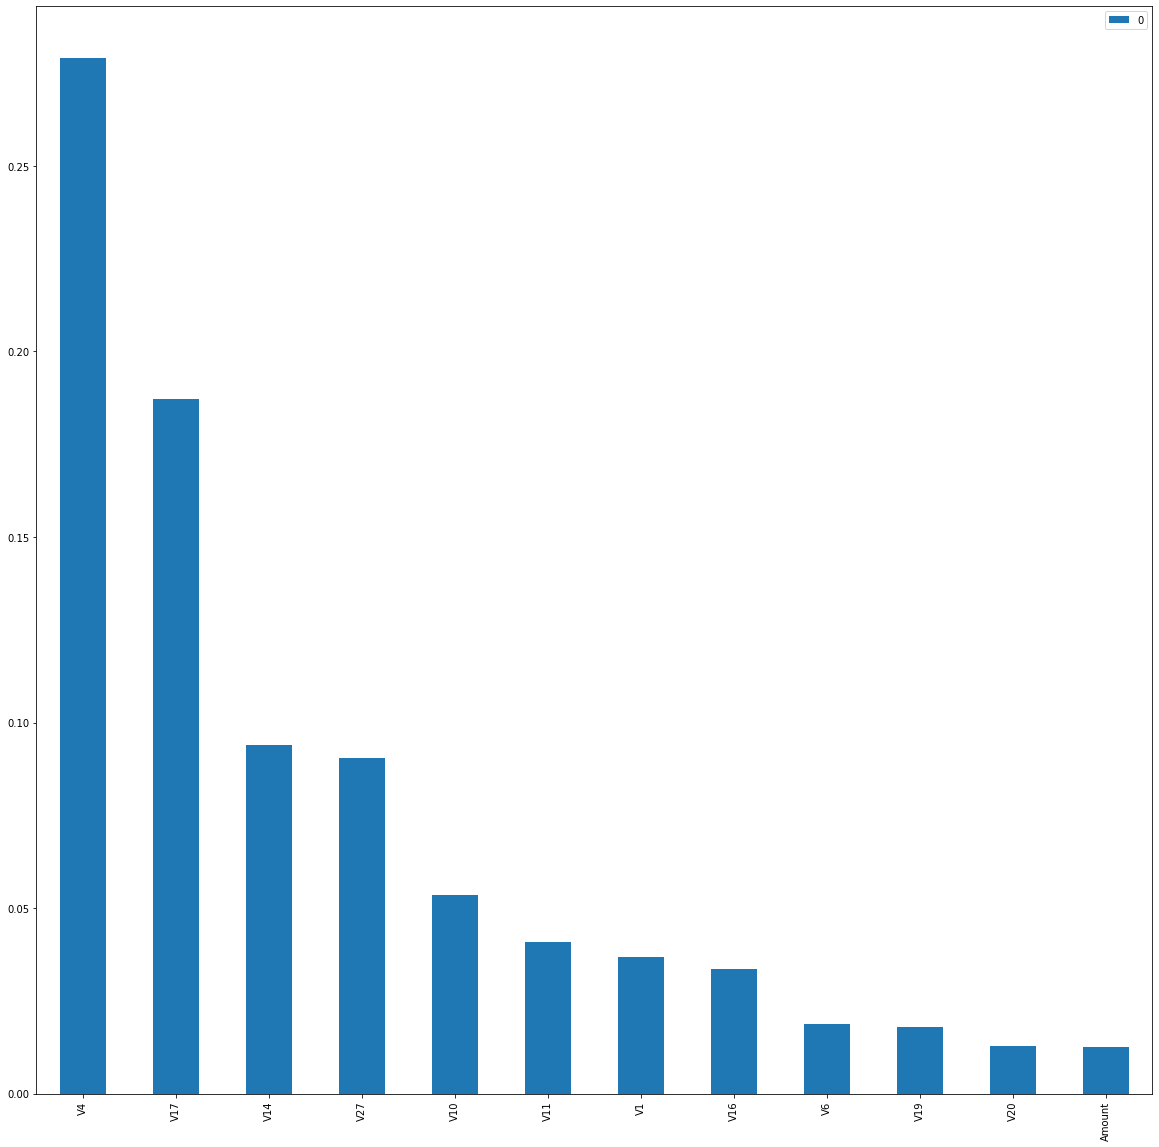

In [252]:
final.plot.bar() 

In [309]:
confusion_matrix(y_test_smote, y_test_xgsmotepred)

array([[70823,    33],
       [   23, 71279]], dtype=int64)

##### Cost Analysis

As False Negative is a greater cost to the bank as it indicates missing out on potential loss to the company, so Recall is an important factor here than precision

Since the false negative cost is the highest, the most optimal model will be the one with the minimum false negatives. In other words, a model with higher sensitivity will fetch a higher net revenue compared to other models.

Hypothetically below is an approximate consideration for cost under below circumstances:

TN (Normal Transaction):	CTP = -1 x Transaction Amount x Merchant Fee
FP (Falsely Flagged Fraud):	CFP = Intervention Cost
FN (Undetected Fraud):	CFN = Transaction Amount
TP (Detected Potential Cost Fraud):	CTP = Intervention Cost (Potential Loss Saved)

Under the Class Imbalance scenario with original data set, it is obesrevd that when no ML is applied and it is a do nothing scenario when we observe the amount Field:

TN: $375,000 (Normal Transactions)
FN:  $60,000 (Fraudulent Transactions Not Caught)

Company is benefitted with (375000-60000)=$315000

Strategy 1 for optimization:
When we analyze  the costs and benefits of (mis)classification, we see that they are heavily dependent upon the amount of the transaction. We can also  bin the transactions into categories, such as those being low, medium, and high-value. 
This makes some sense, as it means that, in transactions less than our cost of intervention, there are no cases for which our automated fraud screening algorithm should trigger. 
Here we need to see that Fraudsters do  not exploit this by making multiple low value fraud transactions.
We also need to consider the Influencing features that are leading to fraudulent transactions and work on them. For example adjusting credit limit based on credit default history

Strategy 2:
We capture all the potential fraud transactions and bear the intevention cost even if it is a false positive. In this case we need to take precision into consideration to optimize the operation. A high Recall with a good precision Model would be an ideal fit for business.
We also need to consider the Influencing features that are leading to fraudulent transactions and work on them. For example adjusting credit limit based on credit default history
